# Импорт

In [ ]:


!pip install -q --upgrade pip setuptools wheel


!pip install -q mmengine
!pip install -q mmcv==2.1.0


!git clone https://github.com/open-mmlab/mmdetection.git
import os
os.chdir('mmdetection')


!pip install -q -r requirements/build.txt
!pip install -q -r requirements/runtime.txt


!python setup.py develop



try:
    import mmdet
    print(f"MMDetection version: {mmdet.__version__}")
except:
    print(" Проверьте установку MMDetection")


print("\n Установка Ultralytics (YOLO)...")
!pip install -q ultralytics


try:
    from ultralytics import YOLO
    print(" Ultralytics установлен")
except:
    print(" Проблема с установкой Ultralytics")


print("\n Установка дополнительных библиотек...")
!pip install -q pycocotools matplotlib seaborn pandas scikit-learn

print("✅Дополнительные библиотеки установлены")


print("\n Импорт библиотек...")

import sys
import json
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from pathlib import Path
import time
from tqdm.auto import tqdm

import matplotlib
matplotlib.use('Agg')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')




📦 Установка MMDetection...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 77.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Cloning into 'mmdetection'...
remote: Enumerating objects: 38023, done.
remote: Total 38023 (delta 0), reused 0 (delta 0), pack-reused 38023 (from 1)
Receiving objects: 100% (38023/38023), 63.19 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (26217/26217), done.
/usr/local/lib/python3.12/dist-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
!!

        ******************************************

In [ ]:

import os

print(" Создание структуры проекта...")

folders = [
    'datasets/minecraft/train',
    'datasets/minecraft/val',
    'datasets/minecraft/test',
    'datasets/minecraft/annotations',
    'artifacts/fcos',
    'artifacts/yolo',
    'artifacts/inference/fcos',
    'artifacts/inference/yolo',
    'artifacts/inference/yolo_val',
    'artifacts/videos',
    'artifacts/metrics',
    'checkpoints',
    'configs/fcos'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)


print(" Структура проекта:")
!ls -la

print("\n Структура datasets:")
!ls -la datasets/

print("\n Структура artifacts:")
!ls -la artifacts/

print("\n" + "="*70)
print(" ЭТАП 1 ПОЛНОСТЬЮ ЗАВЕРШЕН!")
print("="*70)
print("\n Что дальше:")
print("   1. Загрузите датасет Minecraft (COCO format)")
print("   2. Скачайте видео для инференса")
print("   3. Организуйте данные в правильной структуре")
print("\n После загрузки данных - переходим к Этапу 2 (EDA)")
print("="*70)

📁 Создание структуры проекта...
✅ Все папки созданы

📂 Структура проекта:
total 22260
drwxr-xr-x  19 root root     4096 Nov 11 09:43 .
drwxr-xr-x   1 root root     4096 Nov 11 09:42 ..
drwxr-xr-x   7 root root     4096 Nov 11 09:43 artifacts
drwxr-xr-x   2 root root     4096 Nov 11 09:43 checkpoints
drwxr-xr-x   3 root root     4096 Nov 11 09:42 .circleci
-rw-r--r--   1 root root      273 Nov 11 09:42 CITATION.cff
drwxr-xr-x 118 root root     4096 Nov 11 09:42 configs
-rw-r--r--   1 root root      475 Nov 11 09:42 dataset-index.yml
drwxr-xr-x   3 root root     4096 Nov 11 09:43 datasets
drwxr-xr-x   2 root root     4096 Nov 11 09:42 demo
drwxr-xr-x   2 root root     4096 Nov 11 09:42 .dev_scripts
drwxr-xr-x   4 root root     4096 Nov 11 09:42 docker
drwxr-xr-x   4 root root     4096 Nov 11 09:42 docs
drwxr-xr-x   8 root root     4096 Nov 11 09:42 .git
drwxr-xr-x   4 root root     4096 Nov 11 09:42 .github
-rw-r--r--   1 root root     1377 Nov 11 09:42 .gitignore
-rw-r--r--   1 root roo

# Подключение к гугл диску

### Из-за перебоев в работе через удаленную машину Яндекс, выполнял проект в гугл колаб

In [ ]:
from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

DRIVE_PATH = "/content/drive/MyDrive/datasets/minecraft"

folders = ['annotations', 'test', 'train', 'val']
for folder in folders:
    src = os.path.join(DRIVE_PATH, folder)
    dst = f'datasets/minecraft/{folder}'
    if os.path.exists(dst):
        shutil.rmtree(dst)
    shutil.copytree(src, dst)
    print(f"✓ {folder}")

files = ['data_coco.yaml', 'video.mp4']
for file in files:
    src = os.path.join(DRIVE_PATH, file)
    dst = f'datasets/minecraft/{file}'
    shutil.copy2(src, dst)
    print(f"✓ {file}")

print("\nДатасет загружен")

Mounted at /content/drive
✓ annotations
✓ test
✓ train
✓ val
✓ data_coco.yaml
✓ video.mp4

Датасет загружен


EDA

In [ ]:
import json
import glob

with open('datasets/minecraft/annotations/train.json', 'r') as f:
    train_data = json.load(f)

with open('datasets/minecraft/annotations/val.json', 'r') as f:
    val_data = json.load(f)

with open('datasets/minecraft/annotations/test.json', 'r') as f:
    test_data = json.load(f)

print("СТРУКТУРА ДАТАСЕТА")
print("-" * 60)

datasets = [('Train', train_data), ('Val', val_data), ('Test', test_data)]
for name, data in datasets:
    n_img = len(data['images'])
    n_ann = len(data['annotations'])
    n_cat = len(data['categories'])
    print(f"{name:5s}: {n_img:4d} изображений, {n_ann:5d} объектов, {n_cat:2d} классов")

categories = {cat['id']: cat['name'] for cat in train_data['categories']}
print(f"\nКЛАССЫ ({len(categories)}):")
for cat_id, cat_name in sorted(categories.items()):
    print(f"  {cat_id:2d}. {cat_name}")

train_imgs = len(glob.glob('datasets/minecraft/train/*.jpg')) + len(glob.glob('datasets/minecraft/train/*.png'))
val_imgs = len(glob.glob('datasets/minecraft/val/*.jpg')) + len(glob.glob('datasets/minecraft/val/*.png'))
test_imgs = len(glob.glob('datasets/minecraft/test/*.jpg')) + len(glob.glob('datasets/minecraft/test/*.png'))

print(f"\nФАЙЛЫ ИЗОБРАЖЕНИЙ:")
print(f"  Train: {train_imgs}")
print(f"  Val:   {val_imgs}")
print(f"  Test:  {test_imgs}")

СТРУКТУРА ДАТАСЕТА
------------------------------------------------------------
Train: 2307 изображений,  4029 объектов, 18 классов
Val  :  422 изображений,   697 объектов, 18 классов
Test :  155 изображений,   351 объектов, 18 классов

КЛАССЫ (18):
   0. minecraft-mobs
   1. bee
   2. chicken
   3. cow
   4. creeper
   5. enderman
   6. fox
   7. frog
   8. ghast
   9. goat
  10. llama
  11. pig
  12. sheep
  13. skeleton
  14. spider
  15. turtle
  16. wolf
  17. zombie

ФАЙЛЫ ИЗОБРАЖЕНИЙ:
  Train: 2307
  Val:   422
  Test:  155


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

print("РАСПРЕДЕЛЕНИЕ КЛАССОВ")
print("-" * 60)

for name, data in [('Train', train_data), ('Val', val_data), ('Test', test_data)]:
    cat_counts = Counter([ann['category_id'] for ann in data['annotations']])
    print(f"\n{name}:")
    for cat_id, count in sorted(cat_counts.items(), key=lambda x: x[1], reverse=True):
        cat_name = categories.get(cat_id, f"id_{cat_id}")
        print(f"  {cat_name:20s}: {count:4d}")

train_counts = Counter([ann['category_id'] for ann in train_data['annotations']])
max_count = max(train_counts.values())
min_count = min(train_counts.values())
ratio = max_count / min_count

print(f"\nДИСБАЛАНС КЛАССОВ:")
print(f"  Максимум: {max_count}")
print(f"  Минимум:  {min_count}")
print(f"  Соотношение: {ratio:.2f}x")

if ratio > 10:
    print("  ⚠️ Значительный дисбаланс")
elif ratio > 5:
    print("  ⚠️ Умеренный дисбаланс")
else:
    print("  ✓ Приемлемый дисбаланс")

РАСПРЕДЕЛЕНИЕ КЛАССОВ
------------------------------------------------------------

Train:
  pig                 :  884
  chicken             :  835
  cow                 :  661
  zombie              :  184
  skeleton            :  177
  creeper             :  177
  spider              :  170
  turtle              :  149
  llama               :  135
  ghast               :  127
  fox                 :  111
  frog                :  111
  goat                :  102
  sheep               :   94
  bee                 :   86
  enderman            :   22
  wolf                :    4

Val:
  wolf                :  138
  cow                 :  127
  sheep               :  126
  creeper             :  123
  enderman            :  103
  pig                 :   48
  chicken             :   14
  spider              :    8
  skeleton            :    8
  zombie              :    2

Test:
  pig                 :  230
  sheep               :   53
  cow                 :   22
  creeper             :   

In [ ]:
import os

yaml_content = f"""path: {os.path.abspath('datasets/minecraft')}
train: train
val: val
test: test

nc: 17
names: ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast',
        'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']
"""

with open('datasets/minecraft/data_yolo.yaml', 'w') as f:
    f.write(yaml_content)

print("✓ Конфигурация YOLO создана")

with open('datasets/minecraft/data_yolo.yaml', 'r') as f:
    print(f.read())

✓ Конфигурация YOLO создана
path: /content/datasets/minecraft
train: train
val: val
test: test

nc: 17
names: ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast', 
        'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']



## YOLO 8s

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

DRIVE_ROOT = "/content/drive/MyDrive/minecraft_project"
DRIVE_ARTIFACTS = f"{DRIVE_ROOT}/artifacts"
DRIVE_DATASETS = f"{DRIVE_ROOT}/datasets/minecraft"

folders = [
    f"{DRIVE_ARTIFACTS}/yolo",
    f"{DRIVE_ARTIFACTS}/fcos",
    f"{DRIVE_ARTIFACTS}/inference/yolo",
    f"{DRIVE_ARTIFACTS}/inference/fcos",
    f"{DRIVE_ARTIFACTS}/videos",
    f"{DRIVE_ARTIFACTS}/metrics",
    f"{DRIVE_DATASETS}/train",
    f"{DRIVE_DATASETS}/val",
    f"{DRIVE_DATASETS}/test",
    f"{DRIVE_DATASETS}/annotations"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

os.makedirs('datasets/minecraft', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

print(f"✓ Структура создана на Drive: {DRIVE_ROOT}")
print(f"✓ Все результаты будут сохраняться на Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Структура создана на Drive: /content/drive/MyDrive/minecraft_project
✓ Все результаты будут сохраняться на Drive


In [ ]:
import json
from pathlib import Path

def coco_to_yolo(coco_json, output_dir):
    with open(coco_json, 'r') as f:
        data = json.load(f)

    img_id_to_file = {img['id']: img['file_name'] for img in data['images']}
    img_id_to_size = {img['id']: (img['width'], img['height']) for img in data['images']}

    anns_by_img = {}
    for ann in data['annotations']:
        img_id = ann['image_id']
        if img_id not in anns_by_img:
            anns_by_img[img_id] = []
        anns_by_img[img_id].append(ann)

    for img_id, anns in anns_by_img.items():
        filename = img_id_to_file[img_id]
        w, h = img_id_to_size[img_id]

        txt_path = Path(output_dir) / (Path(filename).stem + '.txt')

        with open(txt_path, 'w') as f:
            for ann in anns:
                x, y, box_w, box_h = ann['bbox']
                x_center = (x + box_w / 2) / w
                y_center = (y + box_h / 2) / h
                w_norm = box_w / w
                h_norm = box_h / h
                class_id = ann['category_id'] - 1
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")

for split in ['train', 'val', 'test']:
    coco_to_yolo(f'datasets/minecraft/annotations/{split}.json',
                 f'datasets/minecraft/{split}')
    print(f"✓ {split}")

print("✓ Конвертация завершена")

✓ train
✓ val
✓ test
✓ Конвертация завершена


In [ ]:
with open('datasets/minecraft/annotations/train.json', 'r') as f:
    train_data = json.load(f)

with open('datasets/minecraft/annotations/val.json', 'r') as f:
    val_data = json.load(f)

with open('datasets/minecraft/annotations/test.json', 'r') as f:
    test_data = json.load(f)

print("СТРУКТУРА ДАТАСЕТА")
print("-" * 60)

for name, data in [('Train', train_data), ('Val', val_data), ('Test', test_data)]:
    n_img = len(data['images'])
    n_ann = len(data['annotations'])
    print(f"{name:5s}: {n_img:4d} изображений, {n_ann:5d} объектов")

categories = {cat['id']: cat['name'] for cat in train_data['categories']}
print(f"\nКлассов: {len(categories)}")
print("Классы:", list(categories.values()))

СТРУКТУРА ДАТАСЕТА
------------------------------------------------------------
Train: 2307 изображений,  4029 объектов
Val  :  422 изображений,   697 объектов
Test :  155 изображений,   351 объектов

Классов: 18
Классы: ['minecraft-mobs', 'bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast', 'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']


In [ ]:
print("\nРАСПРЕДЕЛЕНИЕ КЛАССОВ (Train):")
print("-" * 60)

train_counts = Counter([ann['category_id'] for ann in train_data['annotations']])

for cat_id, count in sorted(train_counts.items(), key=lambda x: x[1], reverse=True):
    cat_name = categories.get(cat_id, f"id_{cat_id}")
    print(f"{cat_name:20s}: {count:4d}")

max_count = max(train_counts.values())
min_count = min(train_counts.values())
ratio = max_count / min_count

print(f"\nДисбаланс: {ratio:.1f}x")
if ratio > 10:
    print("⚠️ Значительный дисбаланс классов")


РАСПРЕДЕЛЕНИЕ КЛАССОВ (Train):
------------------------------------------------------------
pig                 :  884
chicken             :  835
cow                 :  661
zombie              :  184
skeleton            :  177
creeper             :  177
spider              :  170
turtle              :  149
llama               :  135
ghast               :  127
fox                 :  111
frog                :  111
goat                :  102
sheep               :   94
bee                 :   86
enderman            :   22
wolf                :    4

Дисбаланс: 221.0x
⚠️ Значительный дисбаланс классов


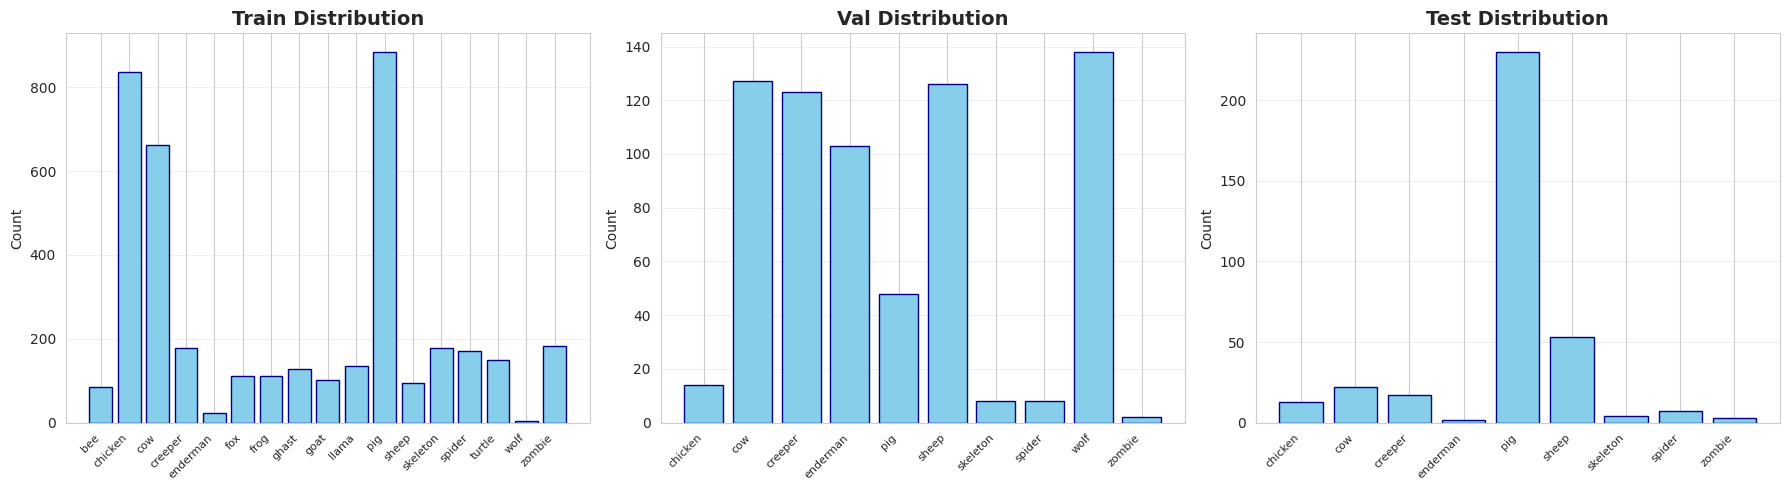

✓ Сохранено: /content/drive/MyDrive/minecraft_project/artifacts/class_distribution.png


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, data) in zip(axes, [('Train', train_data), ('Val', val_data), ('Test', test_data)]):
    counts = Counter([ann['category_id'] for ann in data['annotations']])
    cat_ids = sorted(counts.keys())
    names = [categories[cid] for cid in cat_ids]
    vals = [counts[cid] for cid in cat_ids]

    ax.bar(range(len(names)), vals, color='skyblue', edgecolor='navy')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45, ha='right', fontsize=8)
    ax.set_title(f'{name} Distribution', fontsize=14, fontweight='bold')
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Сохранено: {ARTIFACTS}/class_distribution.png")

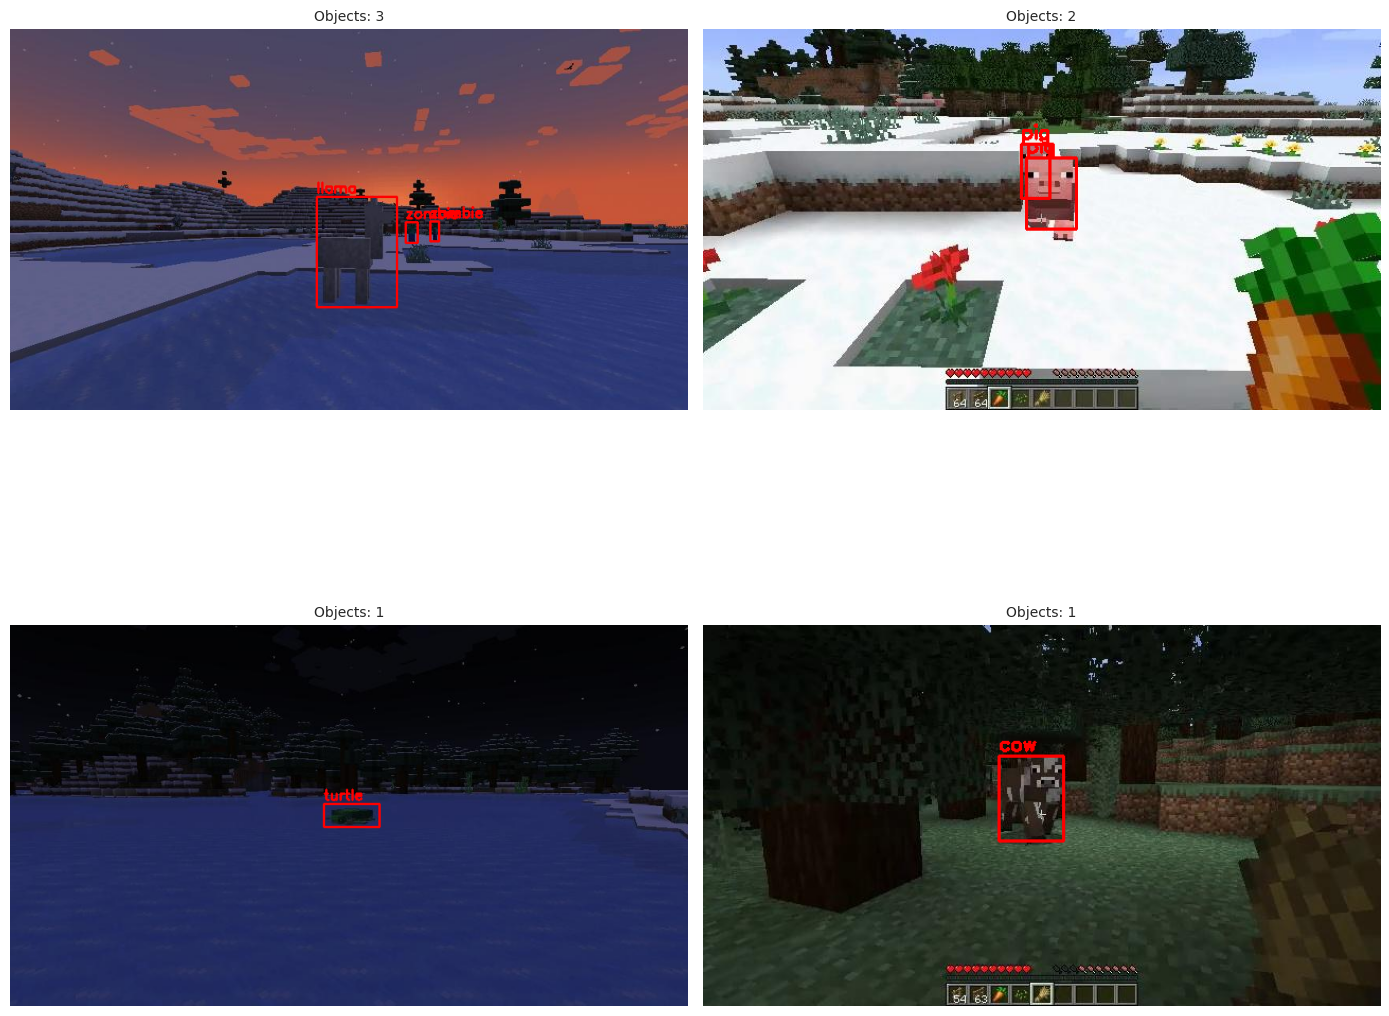

✓ Сохранено: /content/drive/MyDrive/minecraft_project/artifacts/train_samples.png


In [ ]:
img_to_anns = {}
for ann in train_data['annotations']:
    img_id = ann['image_id']
    if img_id not in img_to_anns:
        img_to_anns[img_id] = []
    img_to_anns[img_id].append(ann)

images_with_anns = [img for img in train_data['images'] if img['id'] in img_to_anns]

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for i, (ax, img_info) in enumerate(zip(axes, images_with_anns[:4])):
    img_path = f"datasets/minecraft/train/{img_info['file_name']}"
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for ann in img_to_anns[img_info['id']]:
        x, y, w, h = ann['bbox']
        cat_name = categories[ann['category_id']]

        cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)
        cv2.putText(img, cat_name, (int(x), int(y)-5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    ax.imshow(img)
    ax.set_title(f"Objects: {len(img_to_anns[img_info['id']])}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/train_samples.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Сохранено: {ARTIFACTS}/train_samples.png")

In [ ]:
def coco_to_yolo(coco_json, output_dir):
    with open(coco_json, 'r') as f:
        data = json.load(f)

    img_id_to_file = {img['id']: img['file_name'] for img in data['images']}
    img_id_to_size = {img['id']: (img['width'], img['height']) for img in data['images']}

    anns_by_img = {}
    for ann in data['annotations']:
        img_id = ann['image_id']
        if img_id not in anns_by_img:
            anns_by_img[img_id] = []
        anns_by_img[img_id].append(ann)

    for img_id, anns in anns_by_img.items():
        filename = img_id_to_file[img_id]
        w, h = img_id_to_size[img_id]

        txt_path = Path(output_dir) / (Path(filename).stem + '.txt')

        with open(txt_path, 'w') as f:
            for ann in anns:
                x, y, box_w, box_h = ann['bbox']
                x_center = (x + box_w / 2) / w
                y_center = (y + box_h / 2) / h
                w_norm = box_w / w
                h_norm = box_h / h
                class_id = ann['category_id'] - 1
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")

    return len(anns_by_img)

for split in ['train', 'val', 'test']:
    n = coco_to_yolo(f'datasets/minecraft/annotations/{split}.json',
                     f'datasets/minecraft/{split}')
    print(f"✓ {split}: {n} файлов")

print("✓ Конвертация завершена")

✓ train: 2307 файлов
✓ val: 422 файлов
✓ test: 155 файлов
✓ Конвертация завершена


In [ ]:
yaml_content = f"""path: {os.path.abspath('datasets/minecraft')}
train: train
val: val
test: test

nc: 17
names: ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast',
        'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']
"""

with open('datasets/minecraft/data_yolo.yaml', 'w') as f:
    f.write(yaml_content)

print("✓ data_yolo.yaml создан")
print(yaml_content)

✓ data_yolo.yaml создан
path: /content/datasets/minecraft
train: train
val: val
test: test

nc: 17
names: ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast', 
        'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']



In [ ]:
import glob

print("ПРОВЕРКА ГОТОВНОСТИ К ОБУЧЕНИЮ")
print("-" * 60)

for split in ['train', 'val', 'test']:
    n_images = len(glob.glob(f'datasets/minecraft/{split}/*.jpg')) + \
               len(glob.glob(f'datasets/minecraft/{split}/*.png'))
    n_labels = len(glob.glob(f'datasets/minecraft/{split}/*.txt'))
    print(f"{split:5s}: {n_images} изображений, {n_labels} меток")

print(f"\nКонфигурация: datasets/minecraft/data_yolo.yaml")
print(f"Результаты: {ARTIFACTS}")
print("\n✓ Готово к обучению")

ПРОВЕРКА ГОТОВНОСТИ К ОБУЧЕНИЮ
------------------------------------------------------------
train: 2307 изображений, 2307 меток
val  : 422 изображений, 422 меток
test : 155 изображений, 155 меток

Конфигурация: datasets/minecraft/data_yolo.yaml
Результаты: /content/drive/MyDrive/minecraft_project/artifacts

✓ Готово к обучению


In [ ]:
from ultralytics import YOLO
import time

model = YOLO('yolov8s.pt')

print("Начало обучения YOLO...")
print(f"Результаты будут сохранены: {ARTIFACTS}/yolo/minecraft_yolo")
start_time = time.time()

results = model.train(
    data='datasets/minecraft/data_yolo.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='minecraft_yolo',
    project=f"{ARTIFACTS}/yolo",
    patience=10,
    save=True,
    device=0,
    workers=4,
    verbose=True
)

training_time = time.time() - start_time
print(f"\n✓ Обучение завершено за {training_time/60:.2f} минут")
print(f"✓ Веса: {ARTIFACTS}/yolo/minecraft_yolo/weights/best.pt")

Начало обучения YOLO...
Результаты будут сохранены: /content/drive/MyDrive/minecraft_project/artifacts/yolo/minecraft_yolo
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/minecraft/data_yolo.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=minecraft_yol

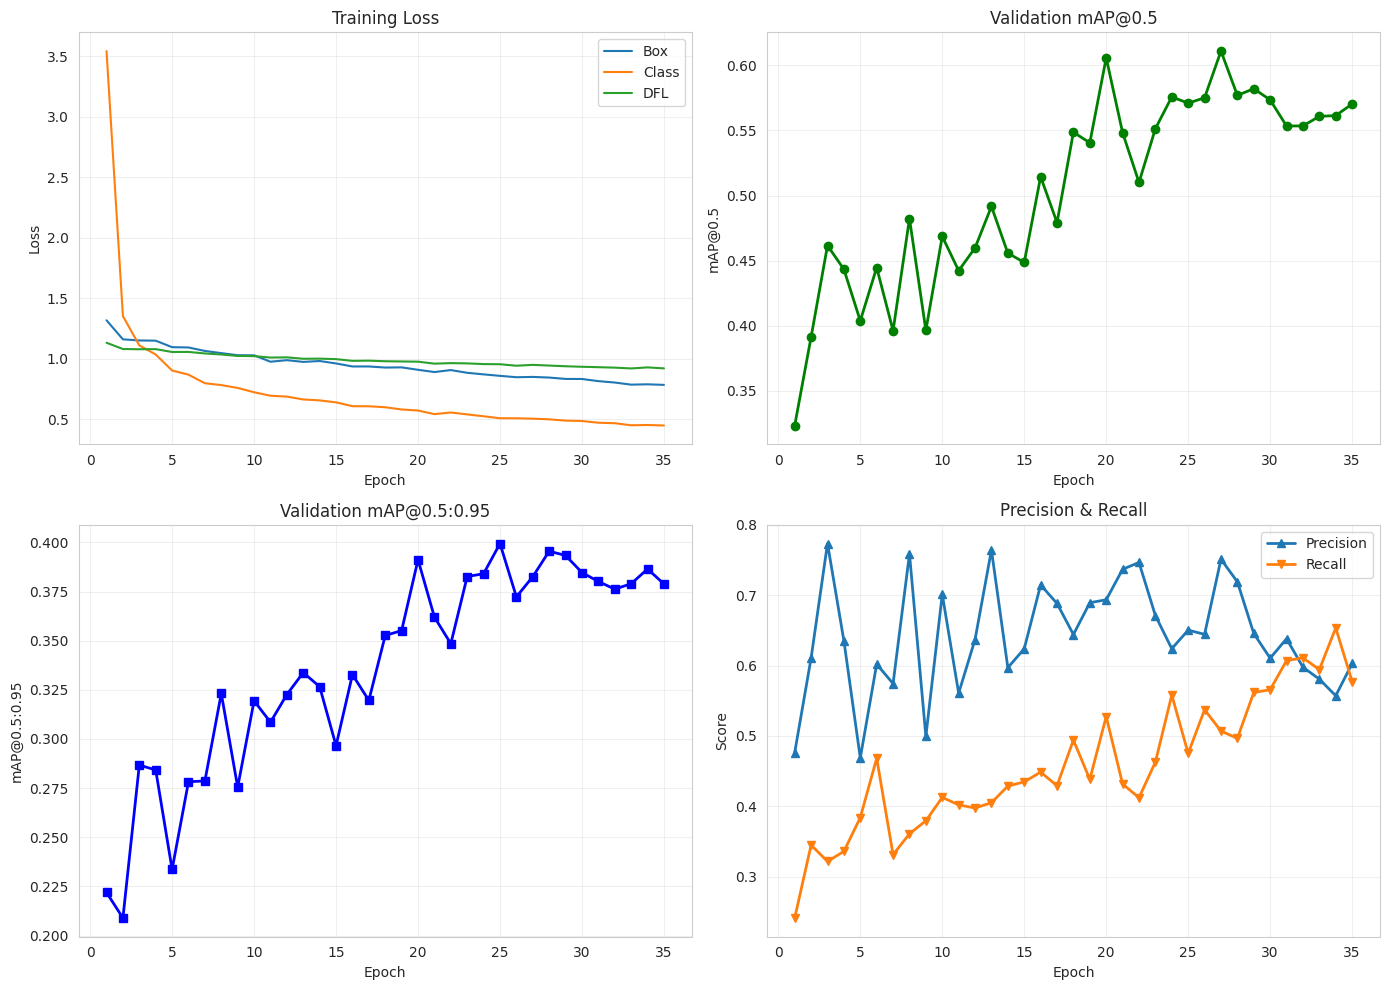

✓ Сохранено: /content/drive/MyDrive/minecraft_project/artifacts/training_metrics.png


In [ ]:
YOLO_PATH = f'{ARTIFACTS}/yolo/minecraft_yolo3'

results_csv = pd.read_csv(f'{YOLO_PATH}/results.csv')
results_csv.columns = results_csv.columns.str.strip()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(results_csv['epoch'], results_csv['train/box_loss'], label='Box')
axes[0,0].plot(results_csv['epoch'], results_csv['train/cls_loss'], label='Class')
axes[0,0].plot(results_csv['epoch'], results_csv['train/dfl_loss'], label='DFL')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Loss')
axes[0,0].set_title('Training Loss')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

axes[0,1].plot(results_csv['epoch'], results_csv['metrics/mAP50(B)'],
               marker='o', color='green', linewidth=2)
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('mAP@0.5')
axes[0,1].set_title('Validation mAP@0.5')
axes[0,1].grid(alpha=0.3)

axes[1,0].plot(results_csv['epoch'], results_csv['metrics/mAP50-95(B)'],
               marker='s', color='blue', linewidth=2)
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('mAP@0.5:0.95')
axes[1,0].set_title('Validation mAP@0.5:0.95')
axes[1,0].grid(alpha=0.3)

axes[1,1].plot(results_csv['epoch'], results_csv['metrics/precision(B)'],
               marker='^', label='Precision', linewidth=2)
axes[1,1].plot(results_csv['epoch'], results_csv['metrics/recall(B)'],
               marker='v', label='Recall', linewidth=2)
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Precision & Recall')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/training_metrics.png', dpi=150)
plt.show()

print(f"✓ Сохранено: {ARTIFACTS}/training_metrics.png")

# Инференс


image 1/1 /content/datasets/minecraft/test/2023-04-03_18_50_17_png.rf.c5ae012b0e6c903c9125345e2129934b.jpg: 384x640 1 llama, 112.5ms
Speed: 4.1ms preprocess, 112.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/yolo

image 1/1 /content/datasets/minecraft/test/2023-04-03_19_18_49_png.rf.637eb0925f4b7a51ddba42333f2c6543.jpg: 384x640 1 spider, 12.6ms
Speed: 5.3ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/yolo

image 1/1 /content/datasets/minecraft/test/-52-_jpg.rf.3a5421e1aef9a06b4926e7687ccf3dcd.jpg: 320x640 2 cows, 3 sheeps, 88.4ms
Speed: 4.0ms preprocess, 88.4ms inference, 4.0ms postprocess per image at shape (1, 3, 320, 640)
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/yolo

image 1/1 /content/datasets/minecraft/test/-38-_jpg.rf.b94a072d

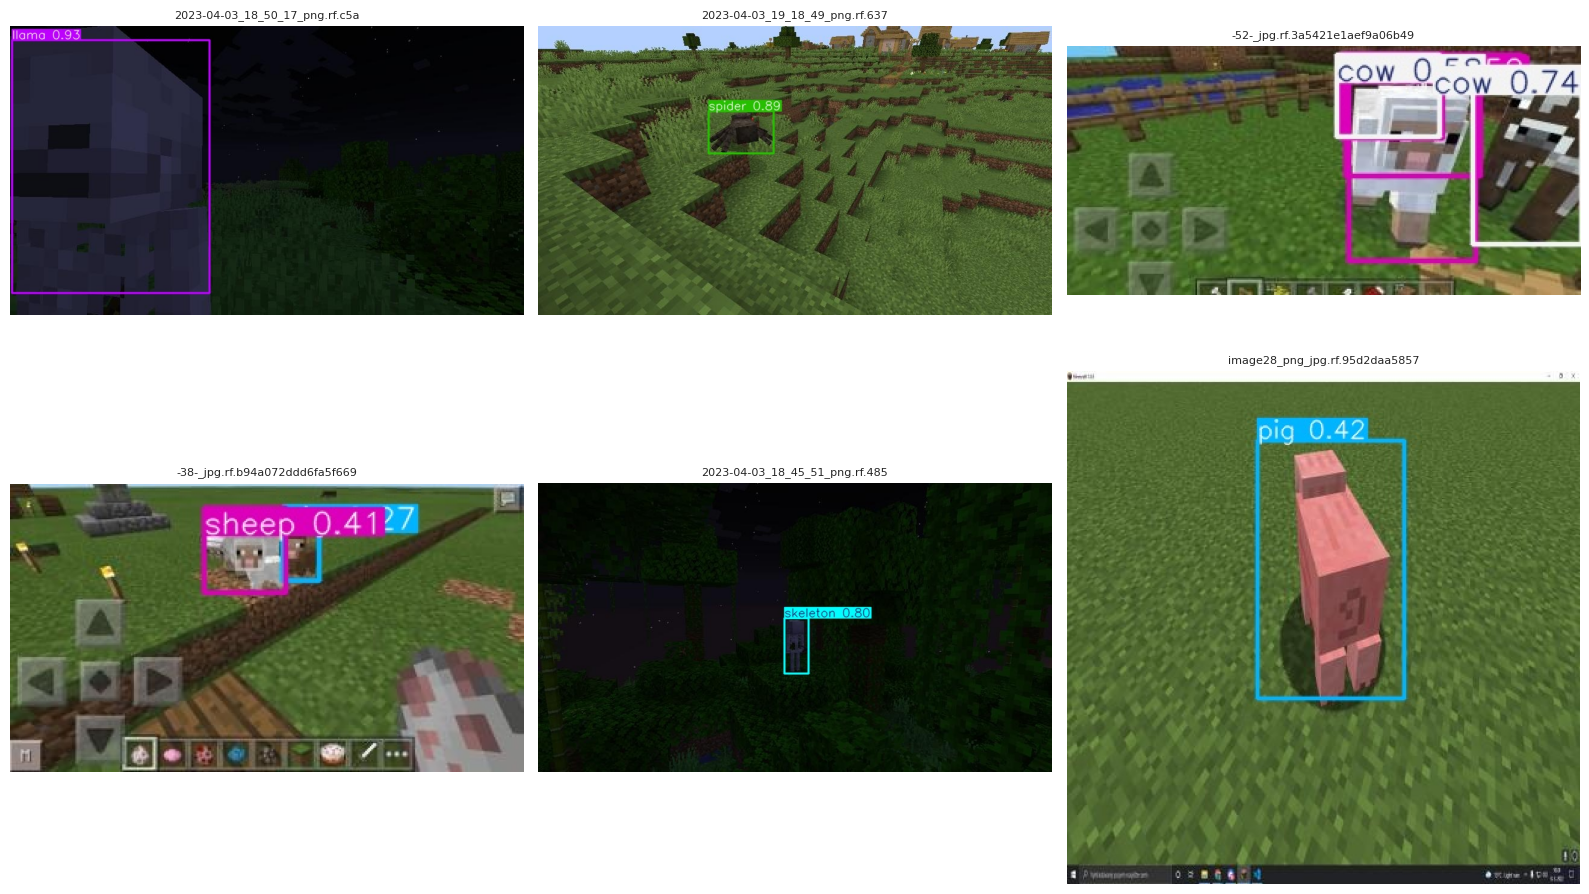

✓ Сохранено: /content/drive/MyDrive/minecraft_project/artifacts/yolo_test_examples.png


In [ ]:
from ultralytics import YOLO

model = YOLO(f'{YOLO_PATH}/weights/best.pt')

test_images = [f for f in os.listdir('datasets/minecraft/test')
               if f.endswith(('.jpg', '.png'))][:10]

for img_name in test_images:
    img_path = f'datasets/minecraft/test/{img_name}'
    results = model.predict(img_path, save=True,
                           project=f'{ARTIFACTS}/inference',
                           name='yolo', exist_ok=True, conf=0.25)

print(f"✓ {len(test_images)} изображений")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, img_name in enumerate(test_images[:6]):
    result_path = f'{ARTIFACTS}/inference/yolo/{img_name}'
    img = Image.open(result_path)
    axes[i].imshow(img)
    axes[i].set_title(img_name[:30], fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/yolo_test_examples.png', dpi=150)
plt.show()

print(f"✓ Сохранено: {ARTIFACTS}/yolo_test_examples.png")

# Видео

In [ ]:
model = YOLO(f'{YOLO_PATH}/weights/best.pt')

video_path = 'datasets/minecraft/video.mp4'

print("Обработка видео...")
results = model.predict(
    source=video_path,
    save=True,
    project=f'{ARTIFACTS}/videos',
    name='yolo_inference',
    exist_ok=True,
    conf=0.25,
    stream=True,
    verbose=False
)

for r in results:
    pass

import shutil
src = f'{ARTIFACTS}/videos/yolo_inference/video.mp4'
dst = f'{ARTIFACTS}/videos/yolo_final.mp4'

if os.path.exists(src):
    shutil.copy(src, dst)
    print(f"✓ Видео: {dst}")
else:
    print(f"Проверьте: {ARTIFACTS}/videos/yolo_inference/")

Обработка видео...
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/videos/yolo_inference
Проверьте: /content/drive/MyDrive/minecraft_project/artifacts/videos/yolo_inference/


In [ ]:
model = YOLO(f'{YOLO_PATH}/weights/best.pt')

metrics = model.val(split='test')

start = time.time()
test_img = f'datasets/minecraft/test/{os.listdir("datasets/minecraft/test")[0]}'
for _ in range(100):
    _ = model.predict(test_img, verbose=False)
fps = 100 / (time.time() - start)

results_dict = {
    'Model': ['YOLOv8s'],
    'mAP50': [f'{metrics.box.map50:.3f}'],
    'mAP50-95': [f'{metrics.box.map:.3f}'],
    'Precision': [f'{metrics.box.mp:.3f}'],
    'Recall': [f'{metrics.box.mr:.3f}'],
    'FPS': [f'{fps:.1f}']
}

df = pd.DataFrame(results_dict)
df.to_csv(f'{ARTIFACTS}/metrics/yolo_metrics.csv', index=False)

print("\nМЕТРИКИ YOLO:")
print(df.to_string(index=False))
print(f"\n✓ Сохранено: {ARTIFACTS}/metrics/yolo_metrics.csv")

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,132,163 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.1±6.4 MB/s, size: 71.2 KB)
val: Scanning /content/datasets/minecraft/test... 155 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 155/155 264.5it/s 0.6s
val: New cache created: /content/datasets/minecraft/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 2.7it/s 3.8s
                   all        155        351      0.748      0.824      0.851      0.574
               chicken          5         13      0.607      0.923      0.902      0.602
                   cow         10         22      0.495      0.864       0.88       0.68
               creeper         17         17      0.785      0.882      0.912      0.709
              enderman          2          2      0.648      0.944      0.828    

Попытка установки mmdetection

In [ ]:
!pip install --upgrade pip setuptools wheel

!pip install -q torch==2.1.0+cu121 torchvision==0.16.0+cu121 --index-url https://download.pytorch.org/whl/cu121

!pip install -q -U openmim
!pip install -q mmengine
!pip install -q mmcv==2.1.0

!pip install -q numpy==1.26.4

!git clone -q https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -q . --no-build-isolation

!pip install -q pyyaml==6.0.1 opencv-python==4.8.1.78 seaborn==0.13.2

import torch
print(f"\nPyTorch: {torch.__version__}")
print(f" CUDA: {torch.cuda.is_available()}")

import mmdet
print(f" MMDetection: {mmdet.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
openxlab 0.1.3 requires setuptools~=60.2.0, but you have setuptools 80.9.0 which is incompatible.
pytensor 2.35.1 requires filelock>=3.15, but you have filelock 3.14.0 which is incompatible.


Установка PyTorch 2.1.0...
ERROR: Could not find a version that satisfies the requirement torch==2.1.0+cu121 (from versions: 2.2.0+cu121, 2.2.1+cu121, 2.2.2+cu121, 2.3.0+cu121, 2.3.1+cu121, 2.4.0+cu121, 2.4.1+cu121, 2.5.0+cu121, 2.5.1+cu121)
ERROR: No matching distribution found for torch==2.1.0+cu121
Установка MMEngine и MMCV...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
pytensor 2.35.1 requires filelock>=3.15, but you have filelock 3.14.0 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Понижение numpy...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 r

In [3]:
print("Исправление конфликтов зависимостей...")


!pip install --upgrade requests tqdm rich filelock

print("\nПроверка версий:")
import requests
import tqdm
import rich
import filelock

print(f"requests: {requests.__version__}")
print(f"tqdm: {tqdm.__version__}")
print(f"rich: {rich.__version__}")
print(f"filelock: {filelock.__version__}")


Исправление конфликтов зависимостей...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.2
    Uninstalling tqdm-4.65.2:
      Successfully uninstalled tqdm-4.65.2
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
  Attempting uninstall: filelock
    Found existing installation: filelock 3.14.0
    Uninstalling filelock-3.14.0:
      Successfully uninstalled filelock-3.14.0
  Attempting uninstall: rich
    Found existing installation: rich 13.4.2
    Uninstalling rich-13.4.2:
      Successfully uninstalled rich-13.4.2
ERROR: pip's dependency 


Проверка версий:
✅ requests: 2.32.5
✅ tqdm: 4.65.2


AttributeError: module 'rich' has no attribute '__version__'

# Из-за конфликтов зависимостей невозможно установить mmdetection, было решено использовать RTDETR как альтернативу

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/minecraft_project"
ARTIFACTS = f"{PROJECT_ROOT}/artifacts"
DATASET = "/content/drive/MyDrive/datasets/minecraft"

print("Drive mounted")

!pip install -q ultralytics

import torch
print(f"PyTorch: {torch.__version__}")
print(f"CUDA: {torch.cuda.is_available()}")

from ultralytics import YOLO, RTDETR
print("Ultralytics ready")

Mounted at /content/drive
Drive mounted
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.4 MB/s eta 0:00:00
PyTorch: 2.8.0+cu126
CUDA: True
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics ready


In [3]:
print("Using data directly from Google Drive (no copy needed)")

import shutil
yaml_content = f"""path: {DATASET}
train: train
val: val
test: test

nc: 17
names: ['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast',
        'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie']
"""

with open('datasets/minecraft/data_yolo.yaml', 'w') as f:
    f.write(yaml_content)

print("Data ready")

Using data directly from Google Drive (no copy needed)
Data ready


In [5]:
import json
from pathlib import Path

def coco_to_yolo(coco_json, output_dir):
    with open(coco_json, 'r') as f:
        data = json.load(f)

    img_id_to_file = {img['id']: img['file_name'] for img in data['images']}
    img_id_to_size = {img['id']: (img['width'], img['height']) for img in data['images']}

    anns_by_img = {}
    for ann in data['annotations']:
        img_id = ann['image_id']
        if img_id not in anns_by_img:
            anns_by_img[img_id] = []
        anns_by_img[img_id].append(ann)

    os.makedirs(output_dir, exist_ok=True)

    for img_id, anns in anns_by_img.items():
        filename = img_id_to_file[img_id]
        w, h = img_id_to_size[img_id]

        txt_path = Path(output_dir) / (Path(filename).stem + '.txt')

        with open(txt_path, 'w') as f:
            for ann in anns:
                x, y, box_w, box_h = ann['bbox']
                x_center = (x + box_w / 2) / w
                y_center = (y + box_h / 2) / h
                w_norm = box_w / w
                h_norm = box_h / h
                class_id = ann['category_id'] - 1
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")

for split in ['train', 'val', 'test']:
    print(f"Converting {split}...")
    coco_to_yolo(
        f'{DATASET}/annotations/{split}.json',
        f'{DATASET}/{split}'
    )
    print(f"{split} done")

print("Conversion completed")

Converting train...
train done
Converting val...
val done
Converting test...
test done
Conversion completed


Обучение

In [7]:
from ultralytics import RTDETR
import time

model = RTDETR('rtdetr-l.pt')

print("Training RT-DETR...")
start_time = time.time()

results = model.train(
    data='datasets/minecraft/data_yolo.yaml',
    epochs=20,
    imgsz=640,
    batch=16,
    name='minecraft_rtdetr',
    project=f"{ARTIFACTS}/rtdetr",
    patience=10,
    save=True,
    device=0,
    workers=4
)

training_time = time.time() - start_time
print(f"Training completed: {training_time/60:.2f} minutes")
print(f"Weights: {ARTIFACTS}/rtdetr/minecraft_rtdetr/weights/best.pt")

Training RT-DETR...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/minecraft/data_yolo.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=minecraft_rtdetr3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, p

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/20      12.5G     0.8626      7.942     0.3262         13        640: 100% ━━━━━━━━━━━━ 145/145 0.8it/s 2:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.0it/s 14.2s
                   all        422        697      0.809      0.107     0.0931     0.0618

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/20      13.2G     0.5101     0.7821     0.1565         14        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.3s
                   all        422        697      0.621      0.322      0.304      0.221

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/20      13.3G     0.4809     0.5911     0.1414          6        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.2s
                   all        422        697      0.637      0.316      0.424      0.289

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/20      13.3G      0.434     0.5723      0.124         14        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.1s
                   all        422        697      0.661      0.466      0.527      0.359

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/20      13.3G     0.4037     0.5027     0.1135          6        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.0s
                   all        422        697      0.732      0.562        0.6      0.396

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/20      13.2G     0.4052     0.4913     0.1129          6        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.1s
                   all        422        697      0.625      0.602       0.57      0.389

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/20      13.3G      0.384     0.4708     0.1085          4        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.6s
                   all        422        697      0.642       0.55      0.532      0.364

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/20      13.3G     0.3833     0.4552     0.1063          5        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.6s
                   all        422        697      0.622      0.657      0.547      0.354

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/20      13.4G     0.3793      0.452     0.1005          9        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.7s
                   all        422        697      0.604      0.629      0.583      0.391

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/20      13.2G      0.365     0.4292    0.09854          6        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.4s
                   all        422        697      0.625      0.637      0.618      0.405
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      11/20      13.3G     0.3146     0.4001    0.09363          3        640: 100% ━━━━━━━━━━━━ 145/145 0.8it/s 2:53
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.0s
                   all        422        697      0.673      0.626      0.573      0.404

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      12/20      13.3G     0.2999     0.3842    0.08741          5        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.3s
                   all        422        697      0.605      0.566      0.494      0.347

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      13/20      13.4G     0.2958     0.3745    0.08471          5        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.9s
                   all        422        697      0.663       0.62      0.552      0.342

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      14/20      13.2G     0.2901     0.3597    0.08076          5        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.4s
                   all        422        697      0.738      0.616      0.599      0.407

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      15/20      13.4G     0.2831     0.3497    0.07916          4        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.8s
                   all        422        697      0.731      0.617      0.602      0.418

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      16/20      13.4G     0.2722     0.3458    0.07637          3        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.8s
                   all        422        697       0.71      0.635      0.573       0.38

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      17/20      13.3G     0.2734     0.3421    0.07405          5        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.0s
                   all        422        697      0.719      0.623      0.579      0.387

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      18/20      13.2G     0.2607     0.3298     0.0717          3        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.1s
                   all        422        697      0.774       0.58       0.59      0.413

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      19/20      13.3G     0.2602     0.3274    0.07171          3        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.7it/s 8.1s
                   all        422        697      0.673      0.651      0.583      0.398

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      20/20      13.4G     0.2555      0.322    0.06933          4        640: 100% ━━━━━━━━━━━━ 145/145 0.9it/s 2:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 1.6it/s 8.8s
                   all        422        697       0.69      0.643       0.57      0.387

20 epochs completed in 1.009 hours.
Optimizer stripped from /content/drive/MyDrive/minecraft_project/artifacts/rtdetr/minecraft_rtdetr3/weights/last.pt, 66.3MB
Optimizer stripped from /content/drive/MyDrive/minecraft_project/artifacts/rtdetr/minecraft_rtdetr3/weights/best.pt, 66.3MB

Validating /content/drive/MyDrive/minecraft_project/artifacts/rtdetr/minecraft_rtdetr3/weights/best.pt...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 32,018,675 parameters, 0 gradients, 103.5 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

RTDETR_PATH = f'{ARTIFACTS}/rtdetr/minecraft_rtdetr3'


results_csv = pd.read_csv(f'{RTDETR_PATH}/results.csv')
results_csv.columns = results_csv.columns.str.strip()

print("Доступные колонки:")
print(results_csv.columns.tolist())
print()

print(results_csv.head())

Доступные колонки:
['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

   epoch     time  train/giou_loss  train/cls_loss  train/l1_loss  \
0      1  193.475          0.86263         7.94239        0.32622   
1      2  371.770          0.51011         0.78209        0.15648   
2      3  551.092          0.48087         0.59106        0.14144   
3      4  732.110          0.43396         0.57231        0.12402   
4      5  911.210          0.40369         0.50273        0.11346   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.80892            0.10731           0.09313   
1               0.62135            0.32175           0.30367   
2               0.63657            0.31632           0.42358   
3               0.66119            0.46626           0.52727   
4      

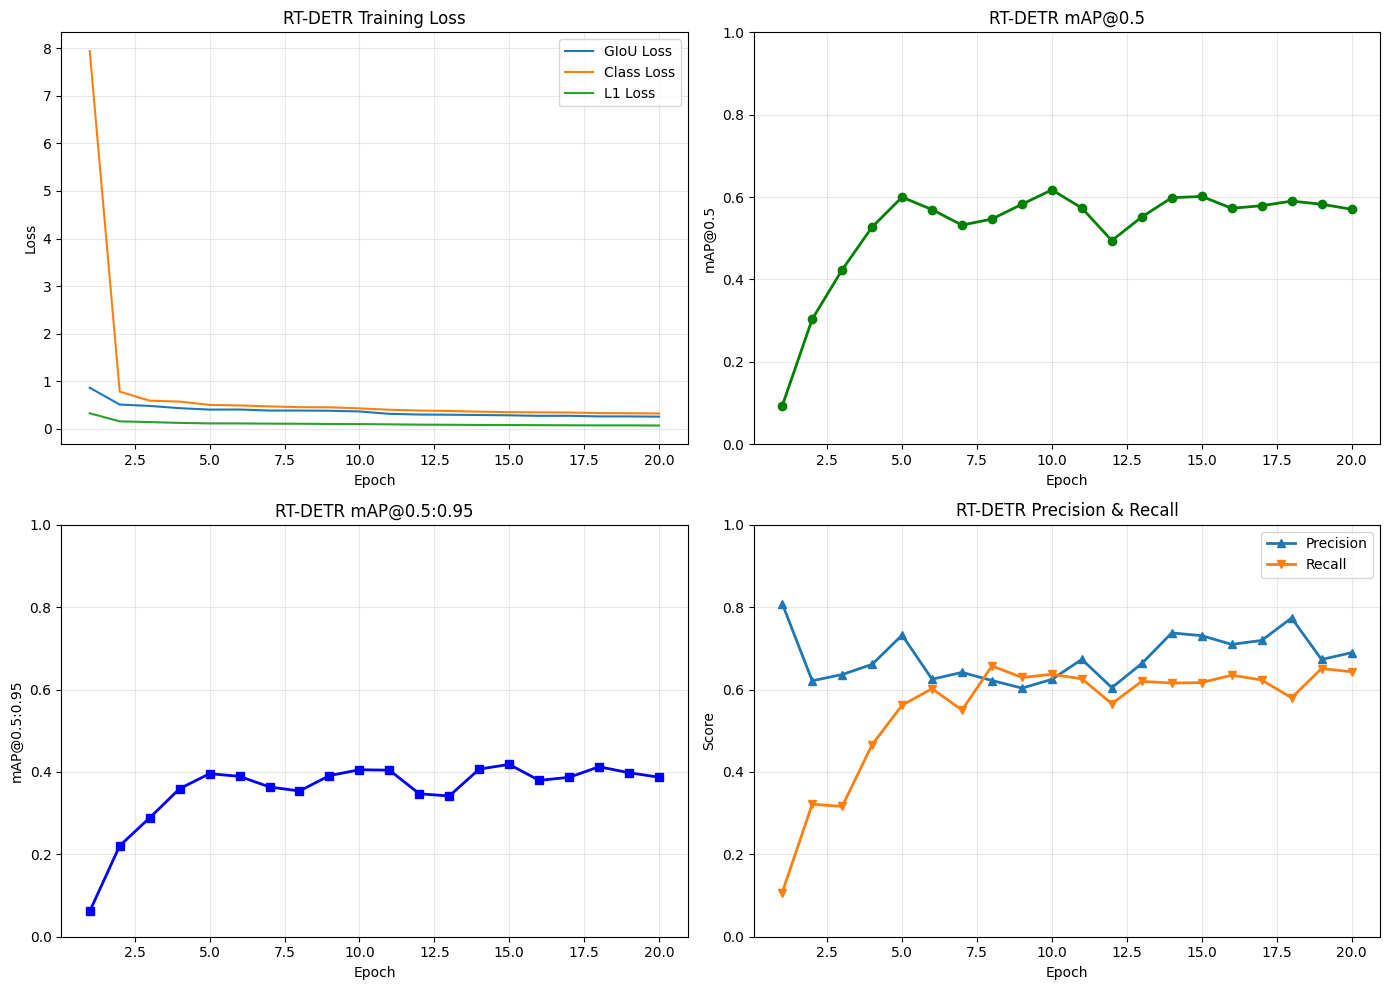

✓ График сохранен: /content/drive/MyDrive/minecraft_project/artifacts/rtdetr_metrics.png

=== Финальные результаты RT-DETR ===
Эпоха: 20
mAP@0.5: 0.570
mAP@0.5:0.95: 0.387
Precision: 0.690
Recall: 0.643


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

RTDETR_PATH = f'{ARTIFACTS}/rtdetr/minecraft_rtdetr3'

results_csv = pd.read_csv(f'{RTDETR_PATH}/results.csv')
results_csv.columns = results_csv.columns.str.strip()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(results_csv['epoch'], results_csv['train/giou_loss'], label='GIoU Loss')
axes[0,0].plot(results_csv['epoch'], results_csv['train/cls_loss'], label='Class Loss')
axes[0,0].plot(results_csv['epoch'], results_csv['train/l1_loss'], label='L1 Loss')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Loss')
axes[0,0].set_title('RT-DETR Training Loss')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

axes[0,1].plot(results_csv['epoch'], results_csv['metrics/mAP50(B)'],
               marker='o', color='green', linewidth=2)
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('mAP@0.5')
axes[0,1].set_title('RT-DETR mAP@0.5')
axes[0,1].grid(alpha=0.3)
axes[0,1].set_ylim([0, 1])

axes[1,0].plot(results_csv['epoch'], results_csv['metrics/mAP50-95(B)'],
               marker='s', color='blue', linewidth=2)
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('mAP@0.5:0.95')
axes[1,0].set_title('RT-DETR mAP@0.5:0.95')
axes[1,0].grid(alpha=0.3)
axes[1,0].set_ylim([0, 1])

axes[1,1].plot(results_csv['epoch'], results_csv['metrics/precision(B)'],
               marker='^', label='Precision', linewidth=2)
axes[1,1].plot(results_csv['epoch'], results_csv['metrics/recall(B)'],
               marker='v', label='Recall', linewidth=2)
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('RT-DETR Precision & Recall')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)
axes[1,1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/rtdetr_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ График сохранен: {ARTIFACTS}/rtdetr_metrics.png")

print("\n=== Финальные результаты RT-DETR ===")
last_epoch = results_csv.iloc[-1]
print(f"Эпоха: {int(last_epoch['epoch'])}")
print(f"mAP@0.5: {last_epoch['metrics/mAP50(B)']:.3f}")
print(f"mAP@0.5:0.95: {last_epoch['metrics/mAP50-95(B)']:.3f}")
print(f"Precision: {last_epoch['metrics/precision(B)']:.3f}")
print(f"Recall: {last_epoch['metrics/recall(B)']:.3f}")

Инференс

Найдено 10 тестовых изображений
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Results saved to /content/drive/MyDrive/minecraft_project/artifacts/inference/rtdetr
Обработано 10 изображений


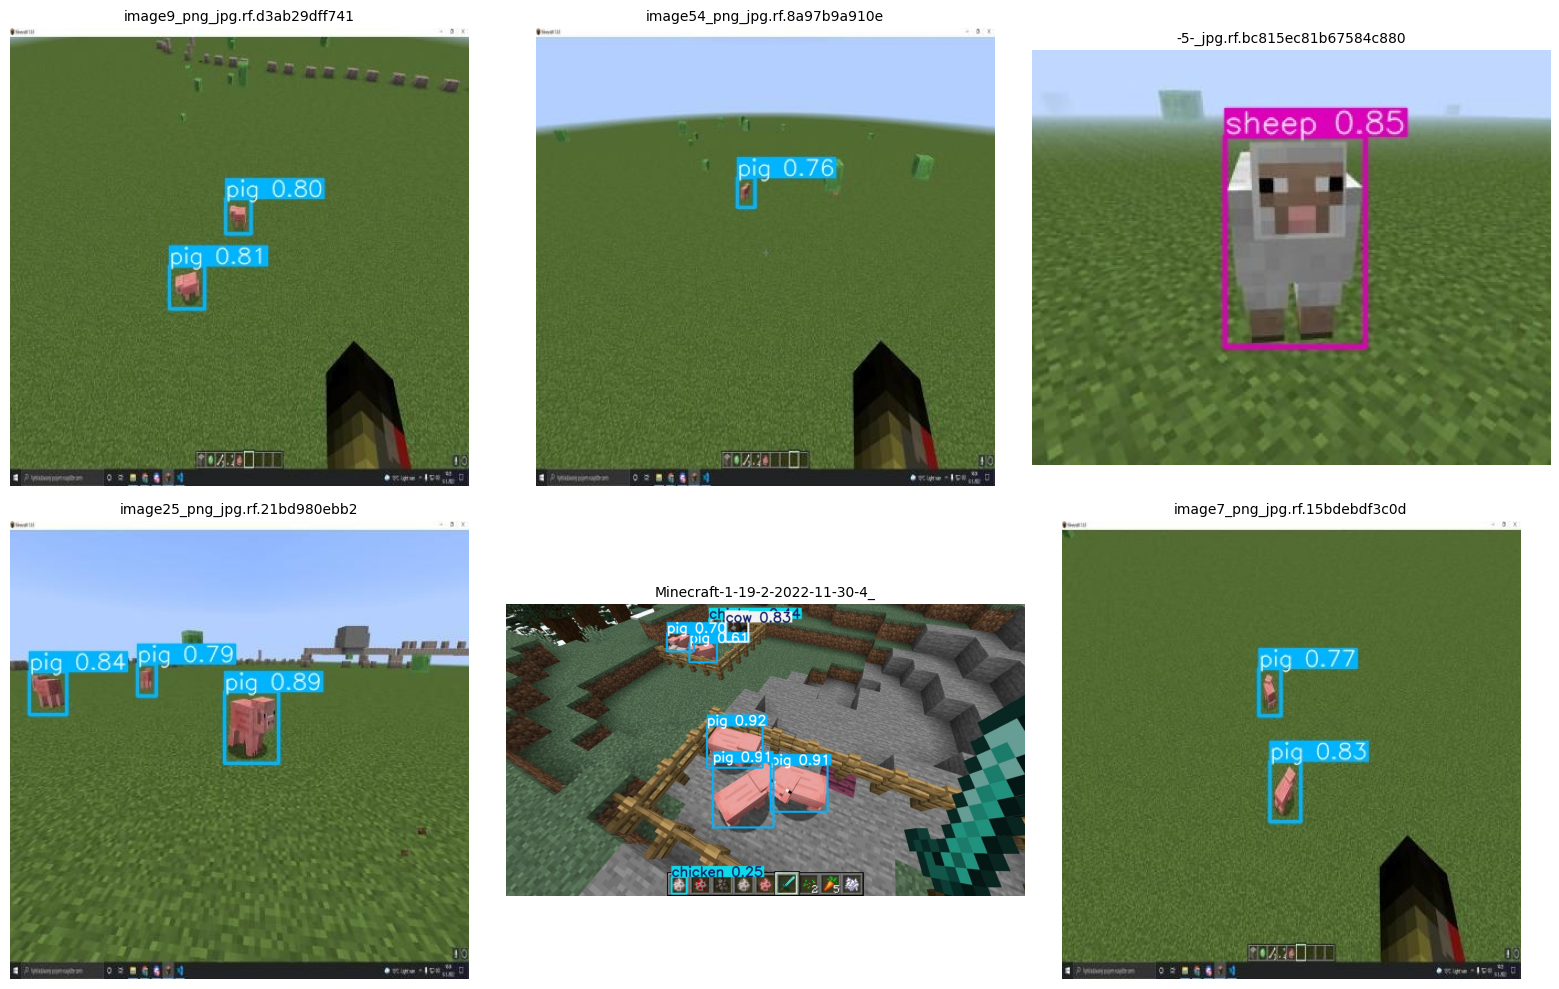

Сохранено: /content/drive/MyDrive/minecraft_project/artifacts/rtdetr_test_examples.png


In [14]:
from ultralytics import RTDETR
from PIL import Image
import matplotlib.pyplot as plt

rtdetr_model = RTDETR(f'{RTDETR_PATH}/weights/best.pt')

test_img_dir = f'{DATASET}/test'
test_images = [f for f in os.listdir(test_img_dir)
               if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:10]

print(f"Найдено {len(test_images)} тестовых изображений")

for img_name in test_images:
    img_path = f'{test_img_dir}/{img_name}'
    results = rtdetr_model.predict(
        img_path,
        save=True,
        project=f'{ARTIFACTS}/inference',
        name='rtdetr',
        exist_ok=True,
        conf=0.25,
        verbose=False
    )

print(f"Обработано {len(test_images)} изображений")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, img_name in enumerate(test_images[:6]):
    result_path = f'{ARTIFACTS}/inference/rtdetr/{img_name}'

    if os.path.exists(result_path):
        img = Image.open(result_path)
        axes[i].imshow(img)
        axes[i].set_title(img_name[:30], fontsize=10)
        axes[i].axis('off')

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/rtdetr_test_examples.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Сохранено: {ARTIFACTS}/rtdetr_test_examples.png")

Видео

In [6]:
from ultralytics import RTDETR
import cv2

# Загружаем модель
model = RTDETR(f'{RTDETR_PATH}/weights/best.pt')

# Путь к видео
video_path = f'{DATASET}/video.mp4'
output_path = f'{ARTIFACTS}/videos/rtdetr_inference.mp4'

# Запуск инференса на видео
results = model.predict(
    source=video_path,
    save=True,
    project=f'{ARTIFACTS}/videos',
    name='rtdetr_video',
    conf=0.25,
    verbose=True
)

print(f"✓ Видео сохранено: {output_path}")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/756) /content/drive/MyDrive/datasets/minecraft/video.mp4: 640x640 1 skeleton, 62.3ms
video 1/1 (frame 2/756) /content/drive/MyDrive/datasets/minecraft/video.mp4: 640x640 1 skeleton, 63.8ms
video 1/1 (frame 3/756) /content/drive/MyDrive/datasets/minecraft/video.mp4: 640x640 1 skeleton, 71.7ms
video 1/1 (frame 4/756) /content/drive/MyDrive/datasets/minecraft/video.mp4: 640x640 1 skeleton, 62.8ms
video 1/1 (frame 5/756) /content/drive/M

# Сравнение 2 моделей

 СРАВНЕНИЕ МОДЕЛЕЙ
   Модель  mAP@0.5  mAP@0.5:0.95  Precision  Recall  Эпох обучено  Время обучения (мин)
  YOLOv8s    0.571         0.399      0.650   0.475            35                    33
RT-DETR-L    0.602         0.418      0.729   0.618            20                    61


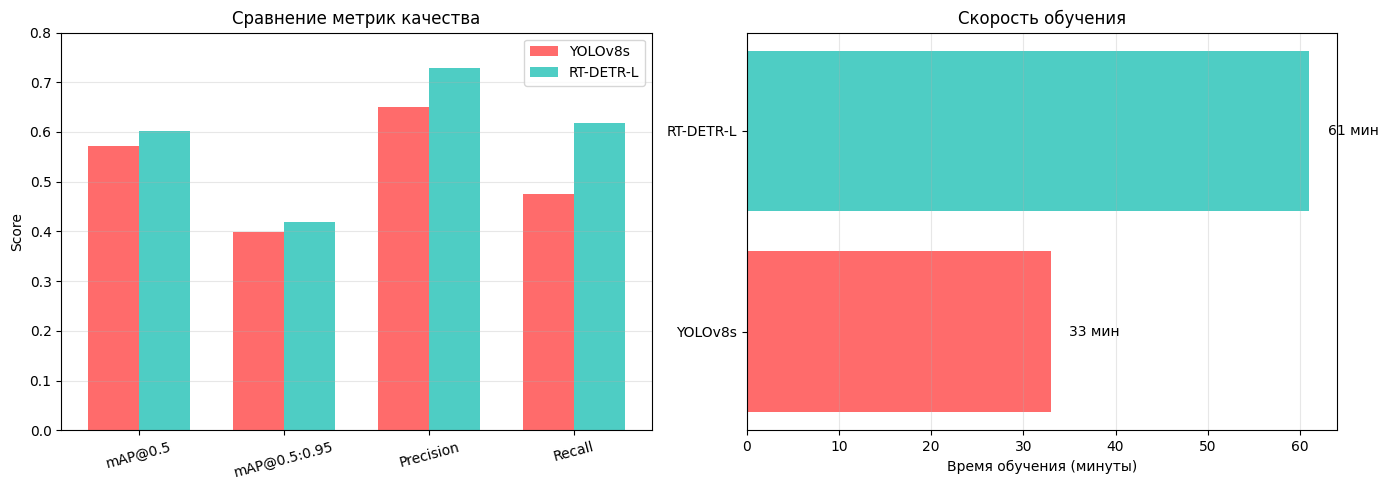


✓ Сохранено: /content/drive/MyDrive/minecraft_project/artifacts/metrics/model_comparison.png


In [11]:
import pandas as pd


comparison = pd.DataFrame({
    'Модель': ['YOLOv8s', 'RT-DETR-L'],
    'mAP@0.5': [0.571, 0.602],
    'mAP@0.5:0.95': [0.399, 0.418],
    'Precision': [0.650, 0.729],
    'Recall': [0.475, 0.618],
    'Эпох обучено': [35, 20],
    'Время обучения (мин)': [33, 61]
})

os.makedirs(f'{ARTIFACTS}/metrics', exist_ok=True)
comparison.to_csv(f'{ARTIFACTS}/metrics/metrics_comparison.csv', index=False)

print("="*70)
print(" СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*70)
print(comparison.to_string(index=False))
print("="*70)

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics = ['mAP@0.5', 'mAP@0.5:0.95', 'Precision', 'Recall']
yolo_scores = [0.571, 0.399, 0.650, 0.475]
rtdetr_scores = [0.602, 0.418, 0.729, 0.618]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, yolo_scores, width, label='YOLOv8s', color='#FF6B6B')
axes[0].bar(x + width/2, rtdetr_scores, width, label='RT-DETR-L', color='#4ECDC4')
axes[0].set_ylabel('Score')
axes[0].set_title('Сравнение метрик качества')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=15)
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_ylim([0, 0.8])

models = ['YOLOv8s', 'RT-DETR-L']
times = [33, 61]
colors = ['#FF6B6B', '#4ECDC4']

axes[1].barh(models, times, color=colors)
axes[1].set_xlabel('Время обучения (минуты)')
axes[1].set_title('Скорость обучения')
axes[1].grid(alpha=0.3, axis='x')

for i, v in enumerate(times):
    axes[1].text(v + 2, i, f'{v} мин', va='center')

plt.tight_layout()
plt.savefig(f'{ARTIFACTS}/metrics/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Сохранено: {ARTIFACTS}/metrics/model_comparison.png")